# Алгоримы и метрики кластеризации

Задача кластеризации - разделение данных на группы так, чтобы данные внутри одной группы были похожи друг на друга, а данные между группами максимально отличались друг от друга.

Существует ряд алгоритмов кластеризации, каждый из которых обладает особенностями применения. 
Наиболее распространенными алгоритмами кластеризации являются:
* K-means [визуализация](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)
* Affinity propogation
* DBScan [визуализация](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)
* MeanShift
* Spectral clustering
* Agglomerative clustering
* Ward
* Birch
* Gaussian Mixture
* Self-Organizing Maps (SOM)
* Growing Neural Gas (GNG)

Сравнения результатов работы некоторых из перечисленных показано в [документации](https://scikit-learn.org/stable/modules/clustering.html#clustering) к библиотеке Scikit-Learn.

![](https://drive.google.com/uc?export=view&id=1PEIz53dSX0E07GXmUW7WaT6vGJES9EmG)

## Метрики для оценки расстояния

Оценка схожести выполняется на основе некоторой метрики. В качестве метрики наиболее популярны:
* Степенное расстояние (метрика Минковского) порядка $ p $
$$ \rho(\mathbf{x}, \mathbf{y}) = \left(\sum_{k=1}^{N}\lvert x_k - y_k \rvert^p \right)^{\dfrac{1}{p}} $$
    
    * Евклидово расстояние, $p=2$: 
    $$ \rho(\mathbf{x}, \mathbf{y}) = \sqrt{\sum_{k=1}^{N}(x_k - y_k)^2} $$
    
    * Манхэттенское расстояние, $p=1$:
    $$ \rho(\mathbf{x}, \mathbf{y}) = \sum_{k=1}^{N}\lvert x_k - y_k \rvert $$

    * Квадрат евклидового расстояния:
    $$ \rho(\mathbf{x}, \mathbf{y}) = \sum_{k=1}^{N}(x_k - y_k)^2$$

    * Расстояние Чебышева:
    $$ \rho(\mathbf{x}, \mathbf{y}) = l_\infty(\mathbf{x}, \mathbf{y}) = \max_{k=1,\ldots,N} \lvert x_k - y_k \rvert $$




##**Метрики кластеризации**
* Силуэт - [silhouette](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)
* Гомогенность - [homogeneity score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html#sklearn.metrics.homogeneity_score)
* Полнота - [completeness score ](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html)
* [V-мера](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html#sklearn.metrics.v_measure_score)
* ARI - [Adjusted Rand Index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)
* AMI - [Adjusted Mutual Information](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_mutual_info_score.html#sklearn.metrics.adjusted_mutual_info_score)
* [другие](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

**Silhouette**

Метрика `silhouette` не требует наличия разметки данных. Метрика `silhouette` для объектов всей выборки определяется как среднее значение `silhouette` для каждого из объектов выборки:
$$\Large silhouette = \dfrac{1}{l} \sum_{i=1}^{l} silhouette_i\,. $$

`Силуэт` каждого из объектов выборки определяется как:
$$\Large silhouette = \dfrac{b-a}{\max(a,b)}\, ,$$

где $a$ - среднее расстояние от объекта до объектов из того же кластера, $ b $ - среднее расстояние от данного объекта до объектов из ближайшего кластера, отличного от того, в котором лежит сам объект.

$ silhouette \in [-1, 1] $ показывает, насколько среднее расстояние до объектов своего кластера отличается от среднего расстояния до объектов других кластеров. В случаях:
* $silhouette = -1$ - кластеризация плохая,
* $silhouette = 0$ - кластеры перенакладываются друг на друга,
* $silhouette = 1$ - кластеры плотные и разделимые.

Использование силуэта позволяет определять оптимальное число кластеров, если оно заранее неизвестно. В таком случае количество оптимальное количество кластеров будет соответствовать такому количеству кластеров, при котором силуэт максимален. В общем случае силуэт зависит от формы кластеров, и достигает больших значений на более выпуклых кластерах, получаемых с помощью алгоритмов, основанных на использовании плотности распределения данных.

**ARI**

Метрика определяется в случае наличия разметки данных. Пусть для выборки размером $l$ применён алгоритм кластеризации. Определим через $a$ - количество пар объектов, которые были отнесены к одному кластеру с соответствующей меткой, а $b$ - число пар объектов, имеющих различные метки и принадлежащие разным кластерам. В таком случае можно определить `Rand Index`:
$$\Large RI = \dfrac{2(a+b)}{l(l-1)}.$$

`Rand Index` показывает доля объектов, для которых разбиения по целевому признакому и по кластерам согласованы. `Rand Index` выражает схожесть двух разных кластеризаций одной и той же выборки. Для того, чтобы `RI` давал значения близкие к нулю для случайных кластеризаций при любом числе кластеров необходимо нормировать его - так и получается `Adjusted Rand Index`:
$$\Large ARI = \dfrac{RI - \Bbb{E}[RI]}{\max{(RI)} - \Bbb{E}[RI]}.$$

Метрика $ARI \in [-1,1]$ является симметричной и не зависит от значений и перестановок меток. В случаях:
* $ARI = -1$ кластеризации независимы друг от друга;
* $ARI = 0$ - случайные разбиения на кластеры ;
* $ARI = 1$ - кластеризации схожи друг на друга.

**AMI**

`AMI` схожа с `ARI` - метрика симметрична, не зависит от значений и перестановок меток. Она вычисляется с использованием энтропии. В таком случае разбиения выборки представляются как дискретные распределения, т.е. вероятность отнесения к кластеру равна доле объектов в нём. Индекс $MI$ определяется как взаимная информация для двух распределений, соответствующих разбиениям выборки на кластеры. Взаимная информация измеряет долю информации, общей для обоих разбиений: насколько информация об одном из них уменьшает неопределенность относительно другого.

Индекс $AMI \in [0,1]$ определяется аналогично `ARI`, избавляясь от роста индекса с увеличением числа классов:
* $AMI = 0$ - разбиения на кластеры являются независимыми;
* $AMI = 1$ - разбиения на кластеры схожи друг с другом.

**Гомогенность, полнота и V-мера**
Метрики определяются с использованияем энтропии и условной энтропии:

$$\Large h = homogeneity = \dfrac{1-H(C|K)}{H(C)}\,, $$

$$\Large c = completeness = \dfrac{1-H(K|C)}{H(K)}\,, $$ 

$$\Large V_{score} = 2 \dfrac{h\,c}{h+c}\,, $$ 
где $ K $ - результат кластеризации,$ C $ - истинное разбиение выборки на классы. 

`Гомогенность` $h \in [0,1] $ показывает, насколько каждый из кластеров состоит из объектов одного класса,  `полнота` $c \in[0,1]$ в свою очередь показывает, насколько объекты одного класса принадлежат к одному кластеру. `Гомогенность` и `полнота`:
* не являются симметричными;
* большие значения метрик соответствуют более качественной кластеризации;
* не являются нормализованными и зависят от числа кластеров. 

При случайной кластеризации метрики не будут равны нулю при большом числе классов и малом числе объектов - в таком случае предпочтительнее использовать метрику `ARI`. Но при числе объектов $l>1000$ и числе кластеров $K < 10$ это не критично.

По аналогии с $F_{\beta}$ в случае кластеризации вводится `V-мера` как среднее гармоническое между `гомогенностью` и `полнотой`. `V-мера` $V_{score} \in [0, 1]$ является симметричной и показывает, насколько две кластеризации схожи между собой.

# K-means

## Принцип работы алгоритма

Алгоритм k-средних делит набор данных N, состоящий из экземпляров X, на К  непересекающихся кластеров С, каждый из которых описывается средним Мi образцом в кластере. Средние значения обычно называют "центроидами" кластера. 
Алгоритм K-средних нацелен на выбор центроидов, которые минимизируют инерцию , или критерий суммы квадратов внутри кластера. 

**Инерцию** можно определить как меру того, насколько кластеры внутренне связаны.Он страдает различными недостатками:

*   Инерция предполагает, что кластеры выпуклые и изотропные, что не всегда так. К-средних плохо реагирует на удлиненные кластеры или коллекторы неправильной формы.
*   Инерция - это не нормализованная метрика: мы просто знаем, что более низкие значения лучше, а ноль - оптимально. Но в пространствах очень большой размерности евклидовы расстояния имеют тенденцию к увеличению (это пример так называемого «проклятия размерности»). Выполнение алгоритма уменьшения размерности, такого как анализ главных компонентов (PCA), перед кластеризацией k-средних может облегчить эту проблему и ускорить вычисления.

![](https://drive.google.com/uc?export=view&id=1W0seJL6--mUS7T8cCo-ig4l9OCKJpZmo)



## Алгоритм работы метода К-средних:

1) Выбрать количество кластеров $ k $

2) Случайным образом инициализировать $ k $ точек в пространстве данных

3) Для каждого примера из набора данных посчитать, к какому центроиду она ближе

4) Для каждой выборки перенести центроид в её центр 

5) Повторять последние два шага фиксированное число раз, либо до тех пор пока центроиды не "сойдутся", то есть их смещение относительно предыдущего положения не превышает заданного значения)

<hr style="height:3px"> 

**Алгоритм k-means**
<hr style="height:3px"> 
<ol>
<li>Случайно инициализировать центроиды кластеров $ \mu_1, \mu_2, \ldots, \mu_k \in \mathcal{R}$. </li>
<li>Повторять до схождения: </li>
    <ul>
        <li> Для каждого $i$: </li>
    $$ \Large c^{(i)} = \arg \min_{j} || x^{(i)} - \mu_j ||^2  $$ 
        <li> Для каждого $j$:
    $$ \Large \mu_j = \dfrac{\displaystyle \sum_{i=1}^{m} 1\{c^{(i)}=j\}x^{(i)}}{\displaystyle \sum_{i=1}^{m} 1\{c^{(i)}=j\}}  $$ </li>
    </ul>
</ol>
<hr style="height:3px"> 

![](https://drive.google.com/uc?export=view&id=1hHYg69qVGeB_EmYyp3zuhpyAQpmlIBEP)

Пример работы алгоритма на Iris датасете
![](https://drive.google.com/uc?export=view&id=1x5iQKiNG2D_nI5IlJJpUE_OleFmJBNwi)


## Пример на синтетических данных
Рассмотрим применение алгоритма на синтетических данных шаг за шагом. Создадим случайное распределние трёх кластеров точек на плоскости.

In [ ]:
%matplotlib notebook
import os  # 
import numpy as np  # lib for arrays
import pandas as pd
import math as mh  # math package

import matplotlib.pyplot as plt  # namespace for plotting
import seaborn as sns

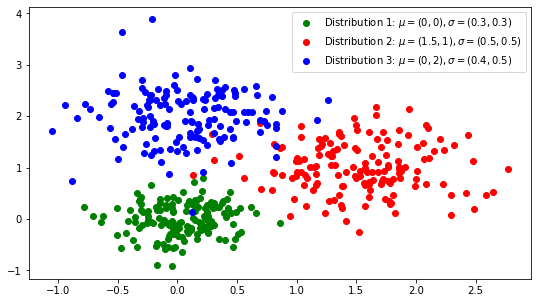

In [ ]:
X = np.zeros((450, 2))
n_points = 150

np.random.seed(seed=99)
X[:n_points, 0] = np.random.normal(loc=0.0, scale=.3, size=n_points)
X[:n_points, 1] = np.random.normal(loc=0.0, scale=.3, size=n_points)

X[n_points: n_points * 2, 0] = np.random.normal(loc=1.5, scale=.5, size=n_points)
X[n_points: n_points * 2, 1] = np.random.normal(loc=1.0, scale=.5, size=n_points)

X[n_points * 2:, 0] = np.random.normal(loc=0.0, scale=.4, size=n_points)
X[n_points * 2:, 1] = np.random.normal(loc=2.0, scale=.5, size=n_points)

plt.figure(figsize=(9, 5))
plt.plot(X[:n_points, 0], X[:n_points, 1], 'go');
plt.plot(X[n_points: n_points * 2, 0], X[n_points: n_points * 2, 1], 'ro');
plt.plot(X[n_points * 2:, 0], X[n_points * 2:, 1], 'bo');
plt.legend(['Distribution 1: $\mu=(0, 0), \sigma=(0.3, 0.3)$',
            'Distribution 2: $\mu=(1.5, 1), \sigma=(0.5, 0.5)$', 
            'Distribution 3: $\mu=(0, 2), \sigma=(0.4, 0.5)$'])
plt.show()


Импортируем функцию [cdist](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html) для рассчета расстояний между парами точек двух массивов.

In [ ]:
from scipy.spatial.distance import cdist

Установим генератор случайных чисел в фиксированное положение для повторяемости.

In [ ]:
np.random.seed(seed=99)

Случайным образом разбросим $k$ точек на плоскости.

In [ ]:
centroids = np.random.normal(loc=0.0, scale=0.5, size=6)
centroids = centroids.reshape((3, 2))

Выполним 3 раза пункты 3) и 4) алгоритма и запомним расположение центроидов.

In [ ]:
cent_history = []
cent_history.append(centroids)

for i in range(3):
    distances = cdist(X, centroids)
    
    labels = distances.argmin(axis=1)

    centroids = centroids.copy()
    centroids[0, :] = np.mean(X[labels == 0, :], axis=0)
    centroids[1, :] = np.mean(X[labels == 1, :], axis=0)
    centroids[2, :] = np.mean(X[labels == 2, :], axis=0)

    cent_history.append(centroids)

Визуализируем расположение центроидов на каждом шаге.

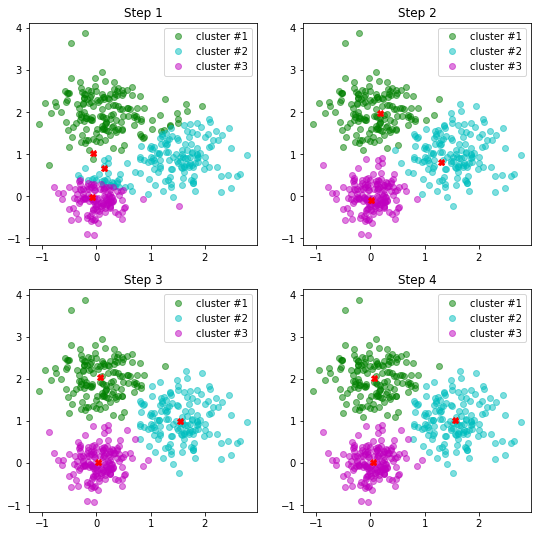

In [ ]:
plt.figure(figsize=(9, 9))
for i in range(4):
    distances = cdist(X, cent_history[i])
    labels = distances.argmin(axis=1)

    plt.subplot(2, 2, i + 1)
    plt.plot(X[labels == 0, 0], X[labels == 0, 1], 'go', label='cluster #1', alpha=0.5)
    plt.plot(X[labels == 1, 0], X[labels == 1, 1], 'co', label='cluster #2', alpha=0.5)
    plt.plot(X[labels == 2, 0], X[labels == 2, 1], 'mo', label='cluster #3', alpha=0.5)
    plt.plot(cent_history[i][:, 0], cent_history[i][:, 1], 'rX')
    plt.legend(loc=0)
    plt.title('Step {:}'.format(i + 1));

## Определение количества кластеров. Правило локтя
Конечное расположение кластеров в случае зашумлённых данных сильно зависит от начального положения кластеров. Для компенсации этого эффекта необходимо применять запуск алгоритма несколько раз и получившиеся кластера усреднять.

Для *K-Means* сходимость обеспечивается выбором метрики, количеством кластеров и за количество шагов, к которому сходится алгоритм. Каждый из этих параметров может быть задан заранее. Наиболее важным из этих параметров является количество кластеров $ K $.

Для запуска алгоритма требуется заранее знать количество кластеров $ K $. Но как это сделать на реальных данных, когда это значение неизвестно?

Для этого необходимо представить задачу нахождения центроидов как задачу оптимизации, где функция оптимизации выявит оптимальное значение количества кластеров $ K $. В качестве такой функции выступает сумма квадратов расстояний:

$$ \Large J(C) = \sum_{k=1}^{K}\sum_{i \in C_k} \| x_i - \mu_k \|^2 \rightarrow \min_{C},$$

где $C$ – множество кластеров мощности $K$, $\mu_k$ – центроид кластера $ C_k $.


Необходимо, чтобы точки располагались кучно возле центроидов своих кластеров. Но вот незадача: минимум такого функционала будет достигаться тогда, когда кластеров столько же, сколько и точек (то есть каждая точка – это кластер из одного элемента).

Для решения этого вопроса (выбора числа кластеров) часто пользуются такой эвристикой: выбирают то число кластеров, начиная с которого функционал $J(C)$ падает уже не так быстро: 

$$ \Large D(k) = \dfrac{\left| J(C_k) - J(C_{k+1}) \right|}{\left| J(C_{k-1}) - J(C_{k}) \right|} \rightarrow \min_{k} $$ 


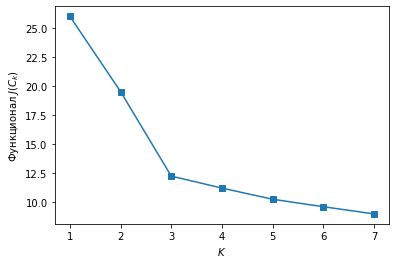

In [ ]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))
    
plt.figure()
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$K$')
plt.ylabel('Функционал $J(C_k)$');

Из рисунка видно, как при $k=3$ функционал $J(C_k)$ падает медленее. Таким образом, графически понятно, что оптимальное значение кластеров равно 3.

**Сложность алгоритма.** С ростом числа данных значительно возрастает вычислительная нагрузка на алгоритм.

Для решения этого часто используются эвристики, например [*MiniBatch K-means*](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html), который для обучения использует не весь датасет целиком, а лишь маленькие его порции (batch) и обновляет центроиды используя среднее за всю историю обновлений центроида от всех относящихся к нему точек.

Реализация алгоритма в scikit-learn обладает массой удобных плюшек, таких как возможность задать количество запусков через параметр *n_init*, что даст более устойчивые центроиды для кластеров в случае скошенных данных. К тому же эти запуски можно делать параллельно, не жертвуя временем вычисления.

Существуют различные вариации K-Means, в которых используются различные подходы для улучшения работы алгоритма. Например, умная инициализация центроидов (K-Means++), использование других метрик для обновления расположения центроида (вместо среднего положения используются медиана и [медоид](https://en.wikipedia.org/wiki/K-medoids) (k-medians и k-medoids).

## Пример Beverage

Сегментация потребителей безалкогольных напитков
Набор данных представляет собой ответы респондентов на предмет употребления в последнее время того или иного напитка.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir("/content/drive/My Drive/BSU/DataSet/Clustering/")
df = pd.read_csv("beverages.csv", sep=";", index_col='numb.obs')
df.head()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
numb.obs,,,,,,,,
1,1,0,0,0,1,1,0,1
2,1,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0
4,0,1,0,1,0,0,1,0
5,1,0,0,0,1,0,0,0


В scikit-learn процедура настройки и использования моделей часто проходит по одной и той же схеме:
1. Инициализация модели, задание её параметров,
2. Подгонка модели (метод fit и/или fit_transform),
3. Предсказание для новых наблюдений (метод predict).

Для кластеризации методом k-means необходимо задать k наперёд. Попробуем k = 2. 

In [ ]:
from sklearn.cluster import KMeans
# инициализация модели
model = KMeans(n_clusters=2, random_state=42)
# random_state - зерно датчика случайных чисел. 
# При каждом новом вызове с одинаковыми random_state модель будет давать
# одинаковые результаты.

In [ ]:
# подгонка модели по данным из df
model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
# Результат кластеризации на данных df
model.labels_

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1], dtype=int32)

In [ ]:
# координаты центров кластеров
model.cluster_centers_

array([[ 9.52380952e-01,  2.38095238e-01,  4.76190476e-02,
        -8.32667268e-17,  7.61904762e-01,  4.28571429e-01,
         4.76190476e-02,  3.80952381e-01],
       [ 1.11022302e-16,  9.23076923e-01,  5.38461538e-01,
         5.38461538e-01, -5.55111512e-17,  1.53846154e-01,
         7.69230769e-01,  7.69230769e-02]])

In [ ]:
# предсказание для новых наблюдений. Метод predict.
new_items = [
    [1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0]
]
model.predict(new_items)

array([1, 0], dtype=int32)

Модель выше разбивала на два кластера. 
Как определить число кластеров?
Применим модель для разного числа кластеров, чтобы построить график каменистой осыпи. Метод ```inertia_``` вернёт сумму расстояний от каждой точки данных до центра ближайшего к ней кластера. Таким образом, кластеризацию можно считать условно хорошей, когда инерция перестаёт сильно уменьшаться при увеличении числа кластеров.

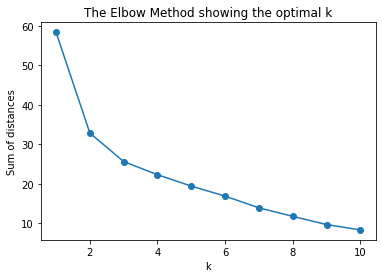

In [ ]:
K = range(1, 11)
models = [KMeans(n_clusters=k, random_state=42).fit(df) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Допустим, мы решили, что три кластера -- это оптимальный выбор. Теперь хочется посмотреть на список наблюдений, составляющий данные кластеры, и посмотреть, чем они отличаются друг от друга. Для этого применим метод labels_, а затем посчитаем средние значения факторов для каждого кластера.

In [ ]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df)
df['cluster'] = model.labels_
df.groupby('cluster').mean()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
cluster,,,,,,,,
0,0.000000,1.000000,0.545455,0.545455,0.000000,0.0,0.909091,0.000000
1,1.000000,0.250000,0.083333,0.000000,0.916667,0.0,0.000000,0.333333
2,0.727273,0.272727,0.090909,0.090909,0.454545,1.0,0.090909,0.454545


In [ ]:
df.groupby('cluster').size()

cluster
0    11
1    12
2    11
dtype: int64

## Пример. Кластеризация претендентов.
----------------------
Рассмотрим данные о приеме на работу на некоторое предприятие. 18
претендентов прошли 10 различных тестов в кадровом отделе. Максимальная
оценка, которую можно было получить на каждом из тестов, составляет 10
баллов, минимальная - 1. Проверялись следующие качества:
1. Память на числа
2. Умение решать математические задачи
3. Находчивость при прямом диалоге
4. Умение составлять алгоритмы
5. Уверенность во время выступления
6. Командный дух
7. Находчивость
8. Сотрудничество
9. Признание в коллективе
10. Сила убеждения

Результаты теста хранятся в файле assess.dat в переменных t1 – t10,
соответственно. В файле присутствуют также переменные с номером и фамилией
участника.
Задача – провести кластерный анализ с целью обнаружения групп
кандидатов, близких по своим качествам.

In [ ]:
df = pd.read_csv('assess.dat', sep='\t', index_col='NAME')
df.head()

,NR,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
NAME,,,,,,,,,,,
Volker,1,10,10,9,10,10,10,9,10,10,9
Sigrid,2,10,10,4,10,5,5,4,5,4,3
Elmar,3,5,4,10,5,10,4,10,5,3,10
Peter,4,10,10,9,10,10,10,9,10,10,9
Otto,5,4,3,5,4,3,10,4,10,10,5


In [ ]:
# В колонке NR находится номер объекта, его нужно исключить из данных для кластеризации
del df['NR']

In [ ]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(df)
df['cluster'] = model.labels_
df.groupby('cluster').mean()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
cluster,,,,,,,,,,
0,10.0,10.0,4.25,10.0,4.75,4.5,3.75,4.25,4.25,4.25
1,4.2,4.8,10.00,4.4,10.00,4.4,10.00,4.00,3.80,10.00
2,4.8,4.4,4.00,4.0,4.20,10.0,4.40,10.00,10.00,5.00
3,10.0,10.0,9.00,10.0,10.00,9.5,9.25,9.75,10.00,9.50


# Hierarchical clustering


Иерархическая кластеризация - это общее семейство алгоритмов кластеризации, которые создают вложенные кластеры путем их последовательного слияния или разделения. Эта иерархия кластеров представлена ​​в виде дерева (или дендрограммы). Корень дерева - это уникальный кластер, который собирает все образцы, а листья - это кластеры только с одним образцом

Полезные ссылки:
* https://docs.scipy.org/doc/scipy-0.14.0/reference/cluster.hierarchy.html
* https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
* http://scikit-learn.org/stable/modules/clustering.html

Пример. Beverage. Сегментация потребителей безалкогольных напитков
--------
Набор данных представляет собой ответы респондентов на предмет употребления в последнее время того или иного напитка.

In [ ]:
df = pd.read_csv("beverages.csv", sep=";", index_col='numb.obs')
df.tail()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
numb.obs,,,,,,,,
30,0,1,1,0,0,0,1,0
31,1,0,0,0,1,0,0,1
32,0,1,1,0,0,0,1,0
33,1,0,0,0,1,0,0,1
34,0,1,1,1,0,0,1,0


Применим алгоритм иерархической кластеризации и построим дендрограмму. Все необходимые вычисления проводятся в функции linkage. Кроме самих данных ей нужно передать на вход два аргумента: метод вычисления расстояний между кластерами (```ward```, ```single```, ```complete```, ```average```) и метрику (```euclidean``` (default), ```cityblock``` aka Manhattan, ```hamming```, ```cosine```). См. [документацию]( https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html).

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Объект, в котором будет хранится информация о последовательном слиянии кластеров
link = linkage(df, 'ward', 'euclidean') 
#ward - метод по которому вычисляется расстояние между кластерами
#eucliaden - метод по которому вычисляется расстояние между объектами

Объект ```link``` представляет собой матрицу ```(n-1) x 4```, где ```n``` -- число наблюдений. Каждая строка матрицы представляет собой результат слияния очередной пары кластеров с номерами ```link[i, 0]``` и ```link[i, 1]```. Новому кластеру присваивается номер ```n + i```. ```link[i, 2]``` означает расстояние между слитыми кластерами, а ```link[i, 3]``` -- размер нового кластера.

In [ ]:
link[:5]

array([[ 5., 10.,  0.,  2.],
       [ 1.,  2.,  0.,  2.],
       [ 4., 35.,  0.,  3.],
       [ 3., 22.,  0.,  2.],
       [20., 36.,  0.,  4.]])

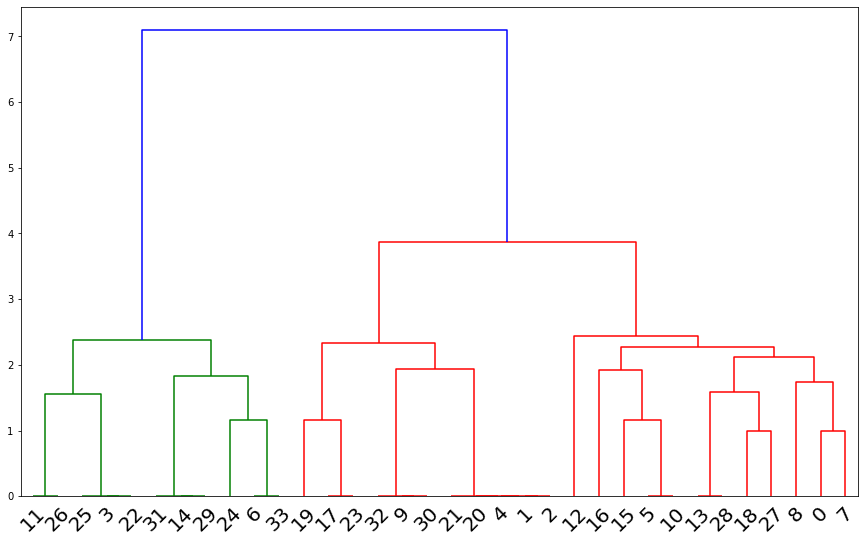

In [ ]:
# Функция для построения дендрограммы
import matplotlib.pyplot as plt
plt.figure(figsize=(15,9))
dn = dendrogram(link, leaf_font_size=20)

Алгоритм подкрасил в дендрограмме два кластера, но здесь скорее кластера всё-таки три. Теперь хочется посмотреть, какими характеристиками различаются наши кластеры.

Сначала добавим к данным колонку ```cluster```, в которую запишем номер кластера, в которую попал объект. Это сделаем с помощью функции ```fcluster```. В качестве первого аргумента передаём объект ```linkage```, полученный выше. Третьим аргументом ```criterion``` передаём критерий для разбиения на кластеры (```distance``` для остановки разбиения по расстоянию между кластерами и ```maxclust``` для разбиения по заданному числу кластеров). Вторым же аргументом является либо пороговое значение для расстояния между кластерами, либо количество кластеров, в зависимости от аргумента ```criterion```.

In [ ]:
# Останавливаем объединение, если расстояние между кластерами превышает 3
df['cluster'] = fcluster(link, 3, criterion='distance')

Теперь вычислим средние значения всех характеристик, сгруппировав данные по номеру кластера. Используем стандартную конструкцию: вызов метода ```groupby``` с последующим применением группирующей функции.

In [ ]:
print(df)

          COKE  D_COKE  D_PEPSI  D_7UP  PEPSI  SPRITE  TAB  SEVENUP  cluster
numb.obs                                                                    
1            1       0        0      0      1       1    0        1        3
2            1       0        0      0      1       0    0        0        2
3            1       0        0      0      1       0    0        0        2
4            0       1        0      1      0       0    1        0        1
5            1       0        0      0      1       0    0        0        2
6            1       0        0      0      1       1    0        0        3
7            0       1        1      1      0       0    1        0        1
8            1       1        0      0      1       1    0        1        3
9            1       1        0      0      0       1    1        1        3
10           1       0        0      0      1       0    0        1        2
11           1       0        0      0      1       1    0        0        3

In [ ]:
df.groupby('cluster').mean()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
cluster,,,,,,,,
1,0.00,1.000000,0.545455,0.545455,0.000000,0.000000,0.909091,0.000000
2,1.00,0.272727,0.090909,0.000000,1.000000,0.000000,0.000000,0.272727
3,0.75,0.250000,0.083333,0.083333,0.416667,0.916667,0.083333,0.500000


Также интересно узнать, сколько наблюдений попало в каждый кластер. Для этого также применяем вызов ```groupy``` с последующим применением метода ```size```.

In [ ]:
df.groupby('cluster').size()

cluster
1    11
2    11
3    12
dtype: int64

**Каменистая осыпь**

А можно было выбрать число кластеров не на глаз по дендрограмме, а автоматически, тем более если данных много? Можно. Построим график, носящий название "каменистая осыпь". Напомним, в матрице ```link``` во второй колонке хранятся расстояния между парами слитых кластеров. По построению, строки матрицы упорядочены по этой колонке.

In [ ]:
dist = link[:, 2]
dist

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 1.        , 1.15470054, 1.15470054, 1.15470054,
       1.54919334, 1.58113883, 1.73205081, 1.82574186, 1.91485422,
       1.93649167, 2.12132034, 2.27636073, 2.33711814, 2.37920282,
       2.446395  , 3.87646865, 7.09212963])

Таким образом, можно построить график зависимости расстояний между кластерами от шага слияния (обратного), и посмотреть, начиная с какого момента это расстояние перестанет значительно меняться.

Text(22, 2.6, '4 clusters')

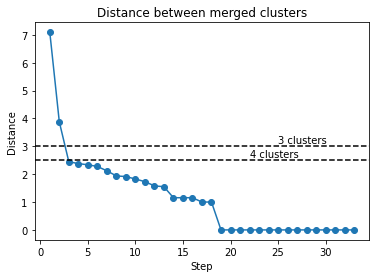

In [ ]:
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')
plt.axhline(3, c='k', linestyle='dashed')
plt.axhline(2.52, c='k', linestyle='dashed')
plt.text(25, 3.1, '3 clusters')
plt.text(22, 2.6, '4 clusters')

Из картинки видно, что если мы остановимся объединять кластеры при расстоянии равном примерно 2.5, мы получим 4 кластера, а при равном 3 -- 3 кластера.

Однако строго говоря, этот способ всё ещё немасштабируем для больших данных. Но его можно просто поправить, включая в график не все подряд слияния, а только несколько последних. И если уж мы совсем хотим автомаизировать процесс, то факт сильного изменения расстояний между кластерами можно фиксировать с помощью производной: там где график выходит на горизонталь, производная станет почти нулём.

## Пример. Потребление протеинов в Европе.
------------------

Потребление протеинов в Европе:
redmeat Мясо (Red meat)
whitemea Птица (White meat)
eggs Яйца (Eggs)
milk Молоко (Milk)
fish Рыба (Fish)
cereals Хлебо-булочные (Cereals)
starch Макароны (?) Крахмал (?) (Starchy foods)
nuts Орехи (Pulses, nuts, and oil-seeds)
fruits_v Фрукты и овощи (Fruits and vegetables)

Задача. Провести кластерный анализ наблюдений.

In [ ]:
df = pd.read_csv('Protein Consumption in Europe.csv', sep=';', decimal=',', index_col='Country')
df.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
Country,,,,,,,,,
Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [ ]:
df.describe()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,9.828000,7.896000,2.936000,17.112000,4.284000,32.248000,4.276000,3.072000,4.136000
std,3.347078,3.694081,1.117617,7.105416,3.402533,10.974786,1.634085,1.985682,1.803903
min,4.400000,1.400000,0.500000,4.900000,0.200000,18.600000,0.600000,0.700000,1.400000
25%,7.800000,4.900000,2.700000,11.100000,2.100000,24.300000,3.100000,1.500000,2.900000
50%,9.500000,7.800000,2.900000,17.600000,3.400000,28.000000,4.700000,2.400000,3.800000
75%,10.600000,10.800000,3.700000,23.300000,5.800000,40.100000,5.700000,4.700000,4.900000
max,18.000000,14.000000,4.700000,33.700000,14.200000,56.700000,6.500000,7.800000,7.900000


Стандартизация данных
--------------------
В этом примере данные, которые мы собираемся кластеризовать, хотя и находятся в одних и тех же единицах измерения, но местами они различаются почти на два порядка, так что будет не лишним их стандартизировать перед анализом. 

В модуле preprocessing библиотеки sklearn реализованы несколько классов стандартизации данных:
* StandardScaler -- приведение к нулевому среднему и единичной дисперсии.
* MinMaxScaler -- приведение данных к отрезку [0, 1].
* MaxAbsScaler -- приведение к [-1, 1] (рекомендуется для разреженных данных).

Процесс стандартизации выглядит так:

In [ ]:
from sklearn import preprocessing

# Выбираем один из вариантов нормализации

norm = preprocessing.StandardScaler()
# norm = preprocessing.MaxAbsScaler()
# norm = preprocessing.MinMaxScaler()

# вычисляем параметры нормализации (они будут сохранены внутри объекта norm)
norm.fit(df)
# преобразовываем данные с параметрами
X = norm.transform(df)
# Полученный на предыдущем шаге объект X -- это матрица класса numpy.ndarray.
# Глазами на неё смотреть неудобно, лучше преобразовать её в объект класса pandas.DataFrame.
X = pd.DataFrame(X, index=df.index, columns=df.columns)

In [ ]:
X.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
Country,,,,,,,,,
Albania,0.082941,-1.794750,-2.224584,-1.179570,-1.225033,0.934804,-2.295965,1.247968,-1.378251
Austria,-0.282974,1.686446,1.245621,0.400468,-0.655111,-0.395051,-0.422218,-0.910790,0.092789
Belgium,1.119699,0.387905,1.062979,0.055732,0.064791,-0.525246,0.889405,-0.499598,-0.076947
Bulgaria,-0.618396,-0.523837,-1.220051,-1.265754,-0.925074,2.273959,-1.983674,0.322786,0.036210
Czechoslovakia,-0.039031,0.968104,-0.124197,-0.662467,-0.685107,0.190830,0.452198,-1.013588,-0.076947


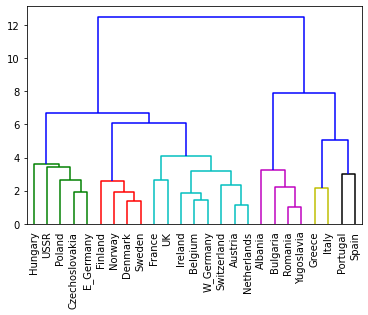

In [ ]:
link = linkage(X, 'ward', 'euclidean')
dn = dendrogram(link,
                # массив с названиями объектов для подписи по оси X
                labels=X.index.tolist(),
                # опция для более красивого отображения слишком ветввистой дендрограммы
                truncate_mode='lastp',
                # повернуть подписи вертикально
                color_threshold=5,
                leaf_rotation=90.)

In [ ]:
X['cluster'] = fcluster(link, 5, criterion='distance')
X.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg,cluster
Country,,,,,,,,,,
Albania,0.082941,-1.794750,-2.224584,-1.179570,-1.225033,0.934804,-2.295965,1.247968,-1.378251,4
Austria,-0.282974,1.686446,1.245621,0.400468,-0.655111,-0.395051,-0.422218,-0.910790,0.092789,3
Belgium,1.119699,0.387905,1.062979,0.055732,0.064791,-0.525246,0.889405,-0.499598,-0.076947,3
Bulgaria,-0.618396,-0.523837,-1.220051,-1.265754,-0.925074,2.273959,-1.983674,0.322786,0.036210,4
Czechoslovakia,-0.039031,0.968104,-0.124197,-0.662467,-0.685107,0.190830,0.452198,-1.013588,-0.076947,1


In [ ]:
X.groupby('cluster').mean()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
cluster,,,,,,,,,
1,-0.581804,0.592356,-0.087668,-0.469990,-0.463137,0.324745,0.801964,-0.273443,0.070157
2,0.006708,-0.233737,0.195427,1.373628,1.182139,-0.890259,0.171136,-0.975039,-1.137793
3,1.032032,0.757437,0.960242,0.581813,-0.272663,-0.701940,0.233594,-0.518873,0.022066
4,-0.824223,-0.889915,-1.585336,-1.100568,-1.060055,1.755502,-1.452779,1.016672,-0.656876
5,-0.069524,-1.062594,-0.078536,-0.210001,0.109785,0.651164,-1.327862,1.530662,1.394093
6,-0.969064,-1.200736,-0.763445,-1.488396,1.894541,-0.385751,0.951864,1.145170,1.931589


# [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

**Density-based spatial clustering of applications with noise** - плотностный алгоритм кластеризации пространственных данных с присутствием шума


[Алгоритм DBSCAN](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf) основан на оценке плотности точек между собой. Он позволяет выделять кластеры сложной формы за счет анализа плотности близлежащих соседей. По этой причине он оперирует 2 основными параметрами:
* *eps* - максимальное расстояние между 2 точками, при котором они могут считаться соседями
* *min_samples* - минимальное количество соседей, при котором создаётся отдельный кластер

Разбор алгоритма DBSCAN показано [здесь](https://habr.com/ru/post/322034/). Оттуда же рекомендации:
* У вас в меру большой датасет с $N\approx10^6$. Даже $N\approx10^7-10^8$, если под рукой оптимизированная и распаралленная реализация.
* Заранее известна функция близости, симметричная, желательно, не очень сложная. KD-Tree оптимизация часто работает только с евклидовым расстоянием.
* Вы ожидаете увидеть сгустки данных экзотической формы: вложенные и аномальные кластеры, складки малой размерности.
* Плотность границ между сгустками меньше плотности наименее плотного кластера. Лучше если кластеры вовсе отделены друг от друга.
* Сложность элементов датасета значения не имеет. Однако их должно быть достаточно, чтобы не возникало сильных разрывов в плотности (см. предыдущий пункт).
* Количество элементов в кластере может варьироваться сколь угодно.
* Количество выбросов значения не имеет (в разумных пределах), если они рассеяны по большому объёму.
* Количество кластеров значения не имеет.



Визуализация работы алгоритма:
![](https://drive.google.com/uc?export=view&id=1sTF7qiYyDuVQiOB_YH3P_gk-9mVuw7Z1)

и еще одна с позитивным настроем на светлое будущее

![](https://drive.google.com/uc?export=view&id=1JDjQ3LIRXCJJHh8QBoPJxEl-zDRxGh1J)

## Пример работы алгоритма

In [ ]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [ ]:
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

In [ ]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


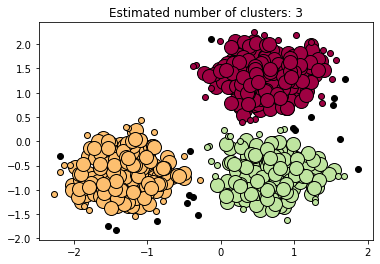

In [ ]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# [t-SNE](https://lvdmaaten.github.io/tsne/)

Инструмент для визуализации многомерных данных

`t-stochastic neighbourhood embedding (t-SNE)` - стохастическое вложение соседей с t-распределением - техника нелинейного снижения размерности данных для визуализации в пространстве низкой размерности - двух или трехмерное. 

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import cm, ticker
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

os.chdir("/content/drive/My Drive/BSU/DataSet/Clustering/")

Mounted at /content/drive


In [ ]:
df_house = pd.read_csv('kc_house_data.csv', index_col = 0)
df_house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df_house = df_house.drop(columns='date', axis=1)
df_house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
house_scaled = df_house.drop(['price', 'yr_built', 'yr_renovated'], axis=1)
house_scaled = StandardScaler().fit_transform(house_scaled)


In [ ]:
house_scaled

array([[-0.39873715, -1.44746357, -0.97983502, ..., -0.30607896,
        -0.9433552 , -0.26071541],
       [-0.39873715,  0.1756067 ,  0.53363434, ..., -0.74634143,
        -0.43268619, -0.18786773],
       [-1.47395936, -1.44746357, -1.42625404, ..., -0.13565477,
         1.07013975, -0.17237524],
       ...,
       [-1.47395936, -1.77207762, -1.15404732, ..., -0.60432128,
        -1.41025258, -0.39414129],
       [-0.39873715,  0.50022075, -0.52252773, ...,  1.02891048,
        -0.8412214 , -0.42051149],
       [-1.47395936, -1.77207762, -1.15404732, ..., -0.60432128,
        -1.41025258, -0.41794772]])

In [ ]:
tsne = TSNE(n_components=2)
house_tsne = tsne.fit_transform(house_scaled)

In [ ]:
house_tsne[:5]

array([[ 38.946655,  57.268326],
       [ 39.49239 , -12.799079],
       [-82.17041 ,  12.277968],
       [ 57.56695 , -28.643637],
       [-66.07314 ,  11.332817]], dtype=float32)

In [ ]:
minima = np.log(df_house['price']).min()
maxima = np.log(df_house['price']).max()

norm = mpl.colors.Normalize(vmin=minima, vmax=maxima, clip=False)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.jet)
mapper.set_array(df_house['price'])
price_colors = mapper.to_rgba(np.log(df_house['price']))

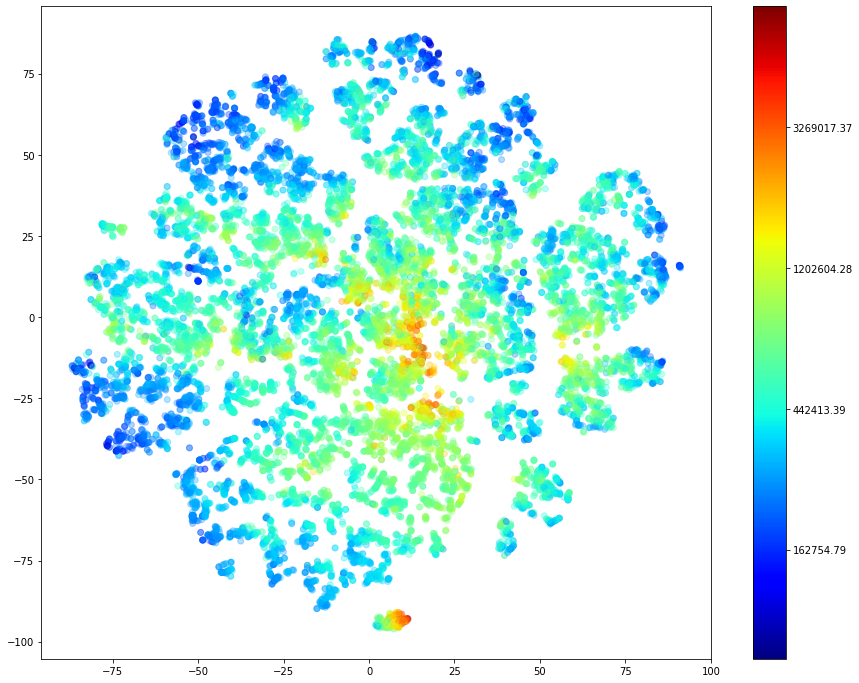

In [ ]:
def label_exp(x, pos):
    return "{:.2f}".format(np.exp(x))

plt.figure(figsize=(15, 12))
sc_plot = plt.scatter(house_tsne[:,0], house_tsne[:,1], alpha=0.3, color=price_colors)
cb = plt.colorbar(mapper, ax=plt.gca())
cb.formatter = ticker.FuncFormatter(label_exp)
cb.update_ticks()

#### Apply K-means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df_house = pd.read_csv('kc_house_data.csv', index_col = 0)
kmeans_res = KMeans(n_clusters=15).fit(house_scaled)

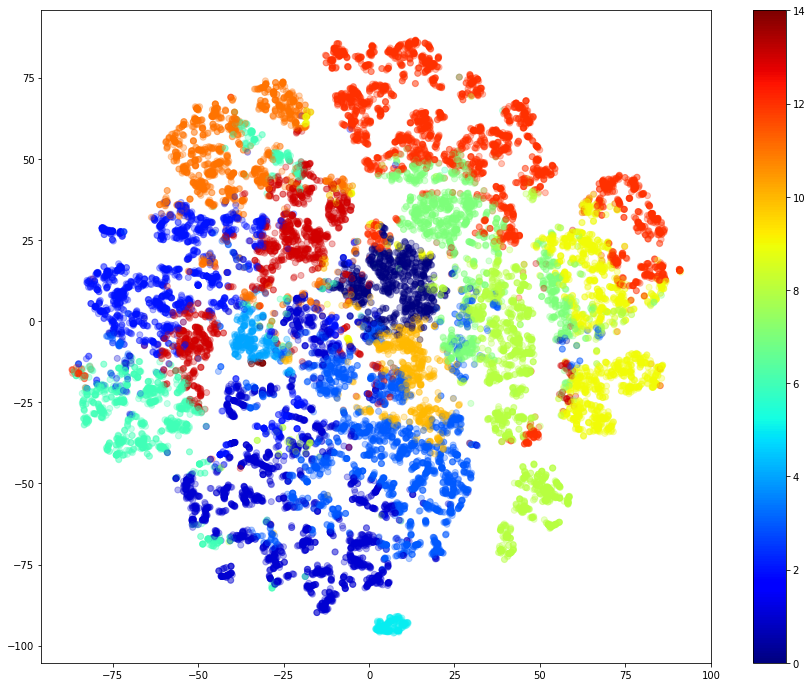

In [ ]:
minima = np.min(kmeans_res.labels_)
maxima = np.max(kmeans_res.labels_)

norm = mpl.colors.Normalize(vmin=minima, vmax=maxima, clip=False)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.jet)
mapper.set_array(kmeans_res.labels_)
price_colors = mapper.to_rgba(kmeans_res.labels_)

plt.figure(figsize=(15, 12))
sc_plot = plt.scatter(house_tsne[:,0], house_tsne[:,1], alpha=0.3, color=price_colors)
cb = plt.colorbar(mapper, ax=plt.gca())

#### Apply DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=2, min_samples=10).fit(house_scaled)
print(len(np.unique(dbscan.labels_)))

3


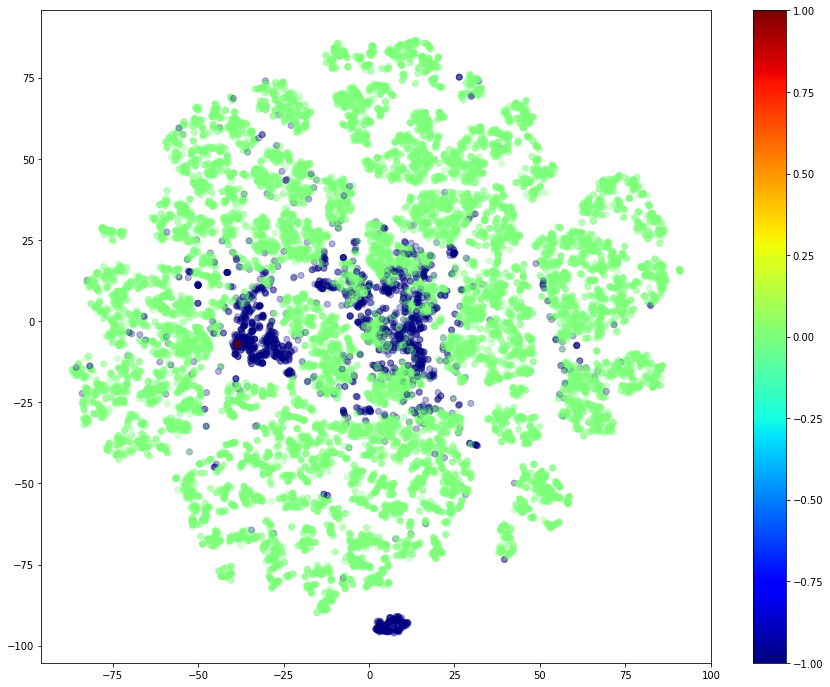

In [ ]:
minima = np.min(dbscan.labels_)
maxima = np.max(dbscan.labels_)

norm = mpl.colors.Normalize(vmin=minima, vmax=maxima, clip=False)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.jet)
mapper.set_array(dbscan.labels_)
price_colors = mapper.to_rgba(dbscan.labels_)

plt.figure(figsize=(15, 12))
sc_plot = plt.scatter(house_tsne[:,0], house_tsne[:,1], alpha=0.3, color=price_colors)
cb = plt.colorbar(mapper, ax=plt.gca())

# Примеры использования группы алгоритмов кластеризации

In [ ]:
from sklearn import metrics
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering, DBSCAN

In [ ]:
data = datasets.load_digits()

X, y = data.data, data.target

algorithms = []
algorithms.append(KMeans(n_clusters=10, random_state=1))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=10, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=10))

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means', 'Affinity', 
                              'Spectral', 'Agglomerative'])

results

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.668587,0.741156,0.739464,0.748061,0.743737,0.182524
Affinity,0.175174,0.612460,0.958907,0.486901,0.645857,0.115197
Spectral,0.756461,0.852040,0.831691,0.876614,0.853562,0.182729
Agglomerative,0.794003,0.866832,0.857513,0.879096,0.868170,0.178497


# ДЗ

Загрузите набор данных согласно варианта. Скачивание наборов данных из репозитория openml.org: https://scikit-learn.org/stable/datasets/loading_other_datasets.html#downloading-datasets-from-the-openml-org-repository

*   В_0 - свой вариант (в рамках ВКР, исследовательской деятельности, просто интересный набор данных)
*   В_1 - кредитный скоринг https://www.openml.org/d/31
*   В_2 - диабед https://www.openml.org/d/37
*   В_3 - рак груди https://www.openml.org/d/15
*   В_4 - быстрые свидания https://www.openml.org/d/40536
*   В_5 - одобрение крелита https://www.openml.org/d/29
*   В_6 - оценка автомобилей https://www.openml.org/d/40975
*   В_7 - классифкация вина https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine
*   В_8 - заболевание печени https://www.openml.org/d/8
*   В_9 - зерна пшеницы https://www.openml.org/d/1499
*   В_10 - жир в организме https://www.openml.org/d/560
<br> <br>

По набору данных согласно варианта необходимо реализовать все ниже перечисленные шаги:
1. Реализовать описательную статистику данных
2. Произвести предварительную обработку данных (удалить неопределенные значения, оцифровать не числовые данные, удалить выбросы, заполнить пропуски при наличии либо удалить и т.д.)
3. Произвести стандартизацию данных
4. Применить t-SNE для визуализации данных и предварительного определения числа кластеров
5. Применить три алгоритма кластеризации К-средних, иерархическая и DBSCAN
6. Оценить качество кластеризации и определить рациональное число кластеров в наборе данных
7. Сформировать выводы по полученным результатам, то есть описать полученные кластеры